In [1]:
%matplotlib inline

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.datasets import make_blobs, load_iris

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score

import time
import warnings
from itertools import cycle, islice

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph

import os

In [3]:
os.environ["OMP_NUM_THREADS"] = "2"

# Clustering

Clustering -> to make classifiction without having classes.

Find a natural grouping in data such that items in the same cluster are more similar to each other than those from different clusters

In [4]:
attributes, clusters = make_blobs(n_samples = 5000)

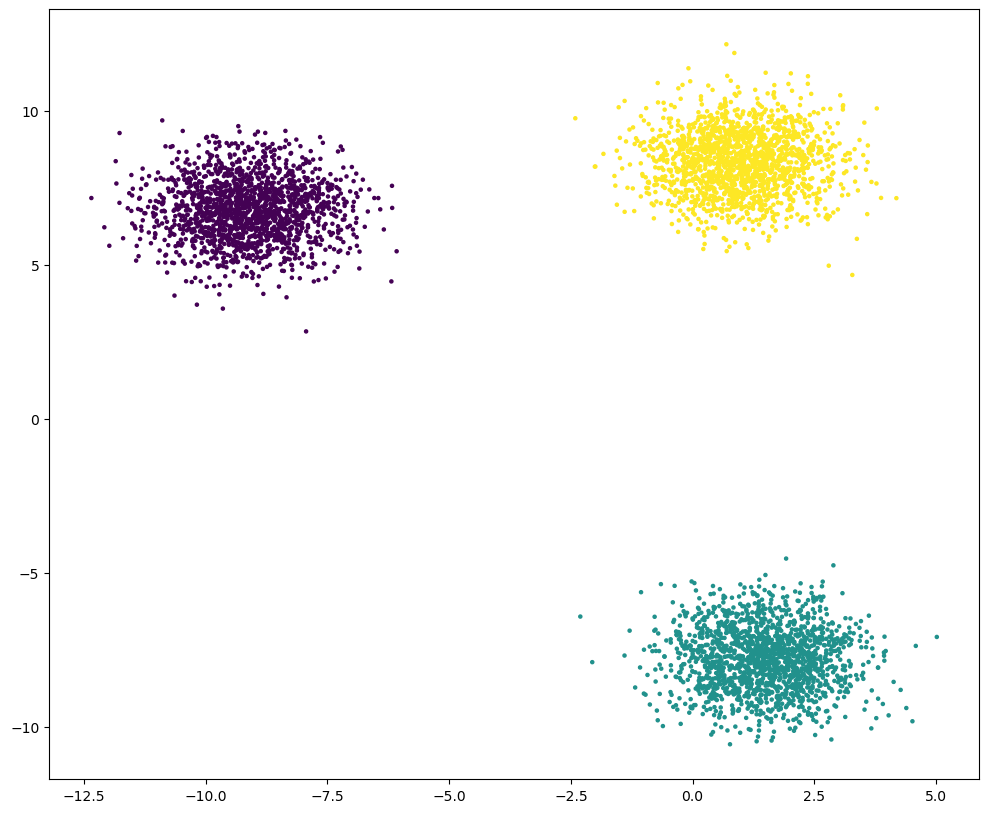

In [5]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters, s = 5)

In [6]:
attr_train, attr_test, clusters_train, clusters_test = train_test_split(attributes, clusters, test_size = 0.1, stratify = clusters)

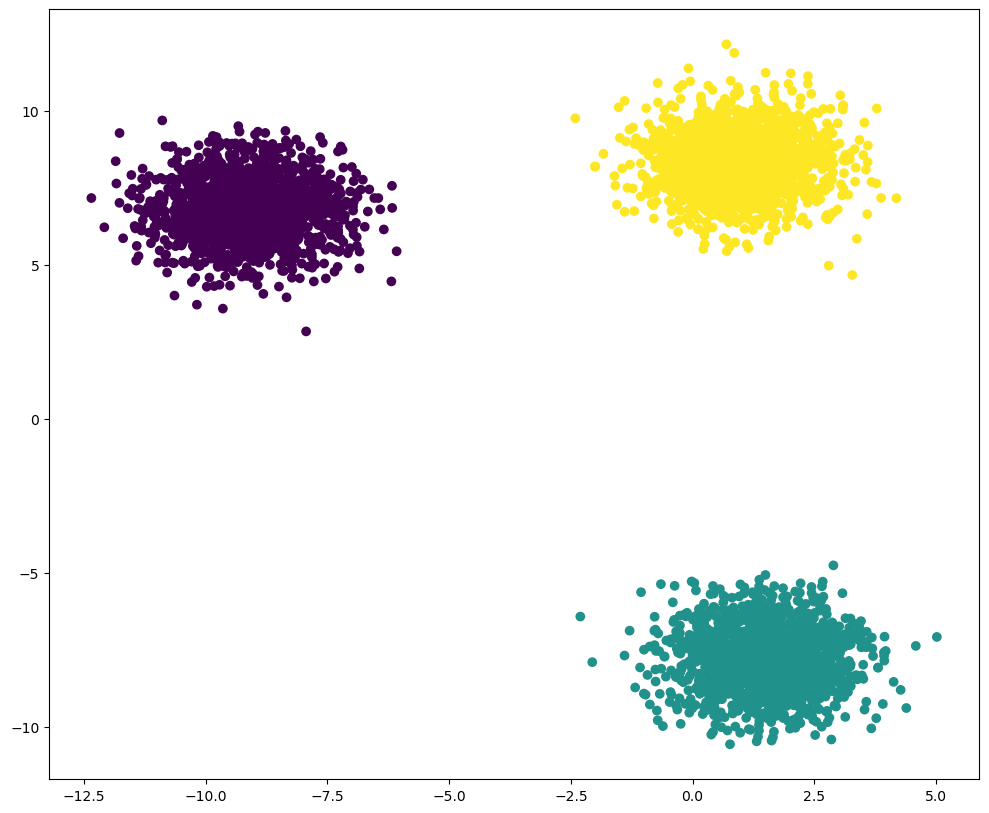

In [7]:
plt.figure(figsize = (12, 10))
plt.scatter(attr_train[:, 0], attr_train[:, 1], c = clusters_train)

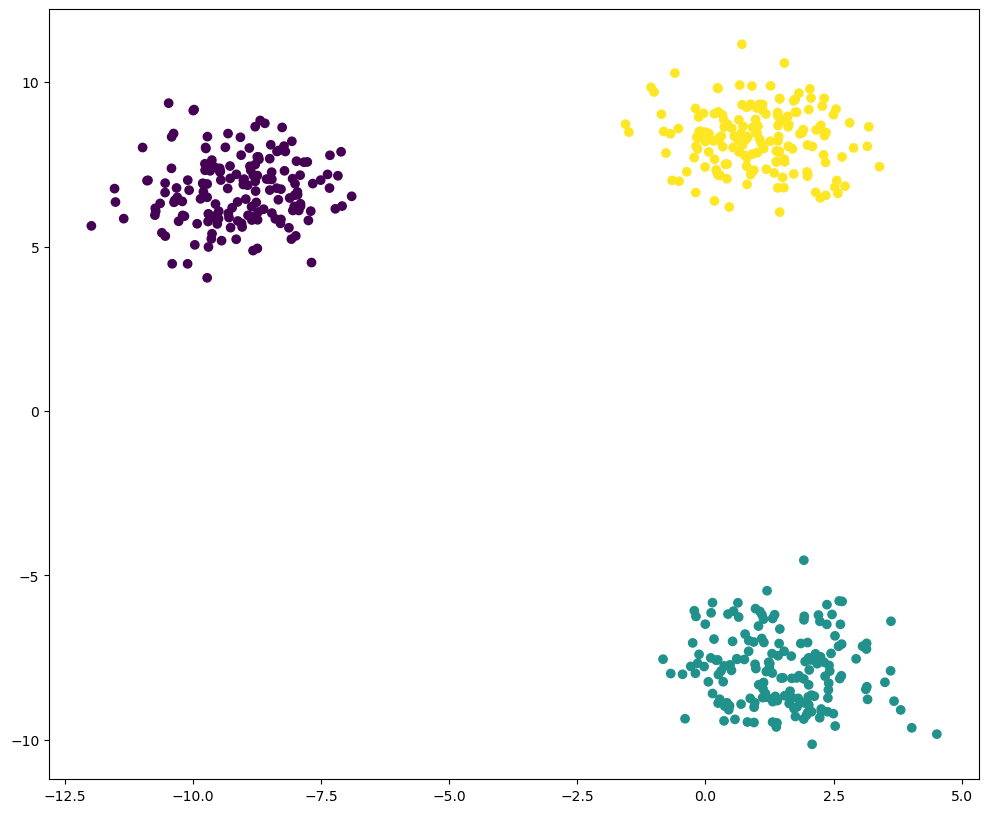

In [8]:
plt.figure(figsize = (12, 10))
plt.scatter(attr_test[:, 0], attr_test[:, 1], c = clusters_test)

In [9]:
k_means = KMeans(n_clusters = 3, init = 'random')

In [10]:
k_means.fit(attr_train)

KMeans(init='random', n_clusters=3)

In [11]:
k_means.predict(attr_train)

array([1, 0, 2, ..., 2, 1, 1])

In [12]:
train_predictions = k_means.predict(attr_train)

In [13]:
test_predictions = k_means.predict(attr_test)

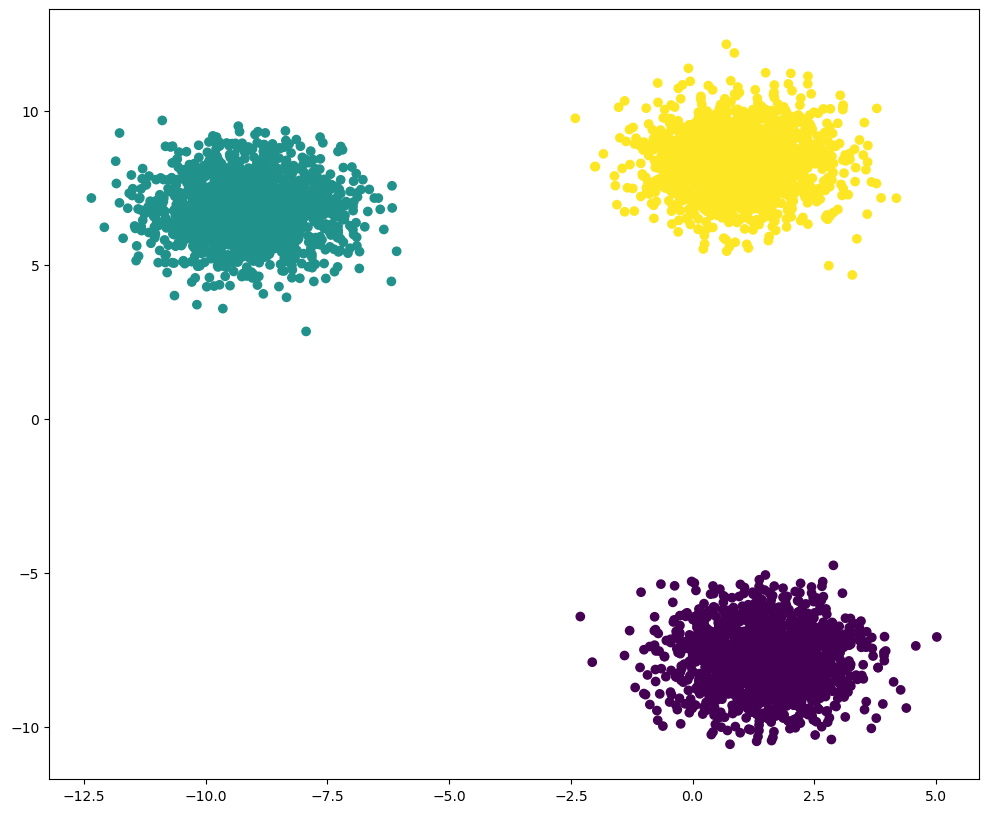

In [14]:
plt.figure(figsize = (12, 10))
plt.scatter(attr_train[:, 0], attr_train[:, 1], c = train_predictions)

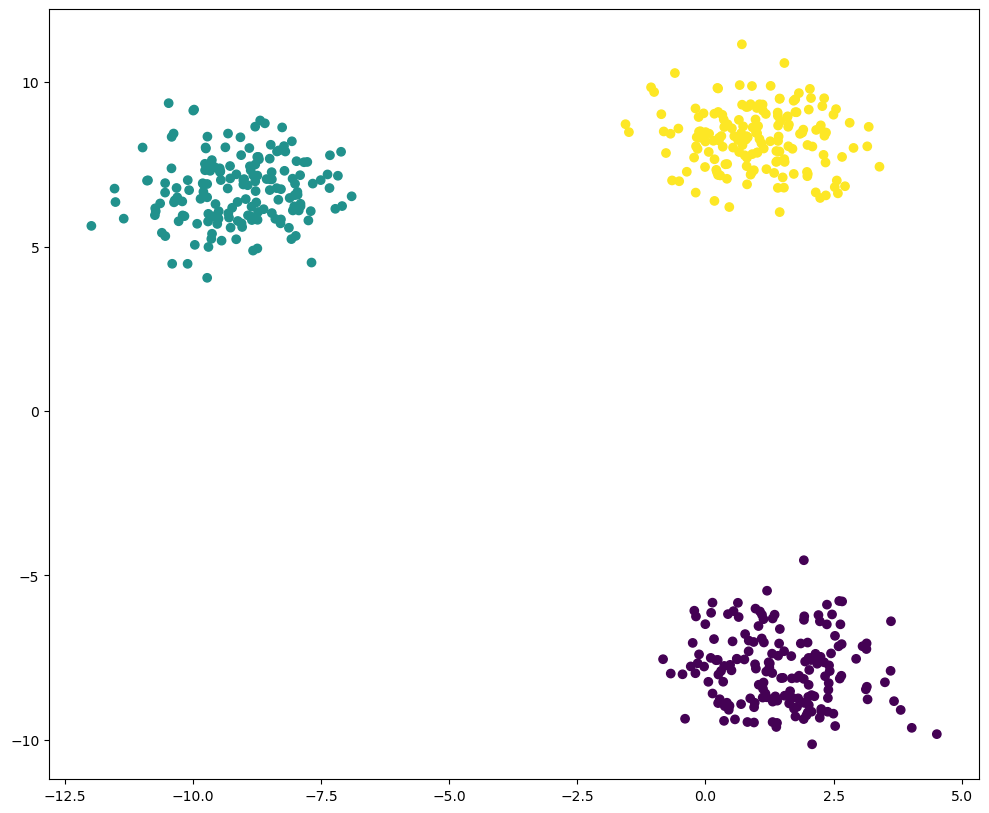

In [15]:
plt.figure(figsize = (12, 10))
plt.scatter(attr_test[:, 0], attr_test[:, 1], c = test_predictions)

<b>Noisy data</b>

In [16]:
attributes, clusters = make_blobs(n_samples = 500, cluster_std = 3)

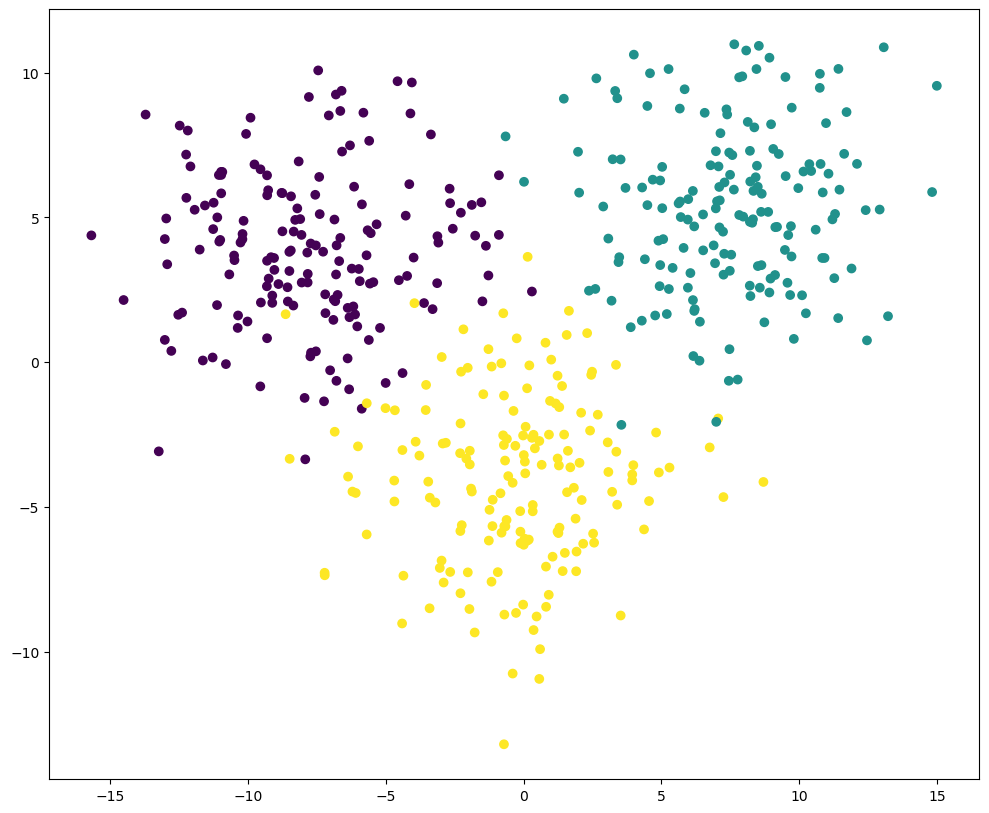

In [17]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)

In [65]:
k_means.fit(attributes)

KMeans(n_clusters=10)

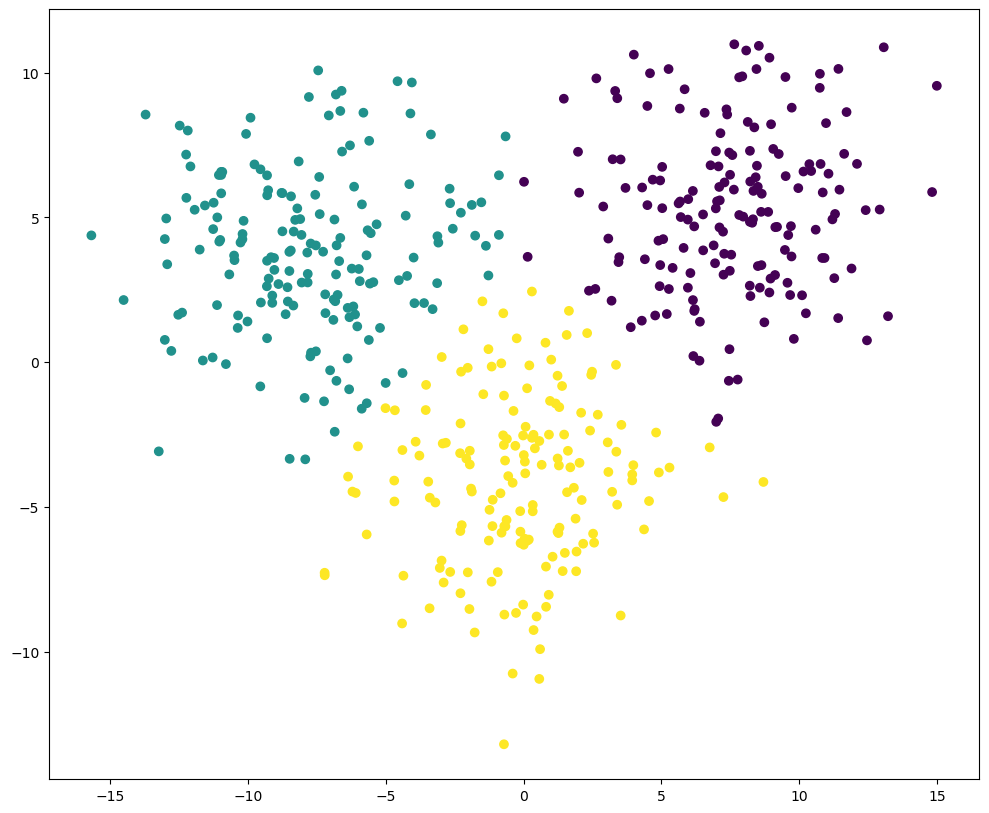

In [19]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = k_means.predict(attributes))

In [20]:
k_means = KMeans(n_clusters = 5, init = 'random')

In [66]:
k_means.fit(attributes)

KMeans(n_clusters=10)

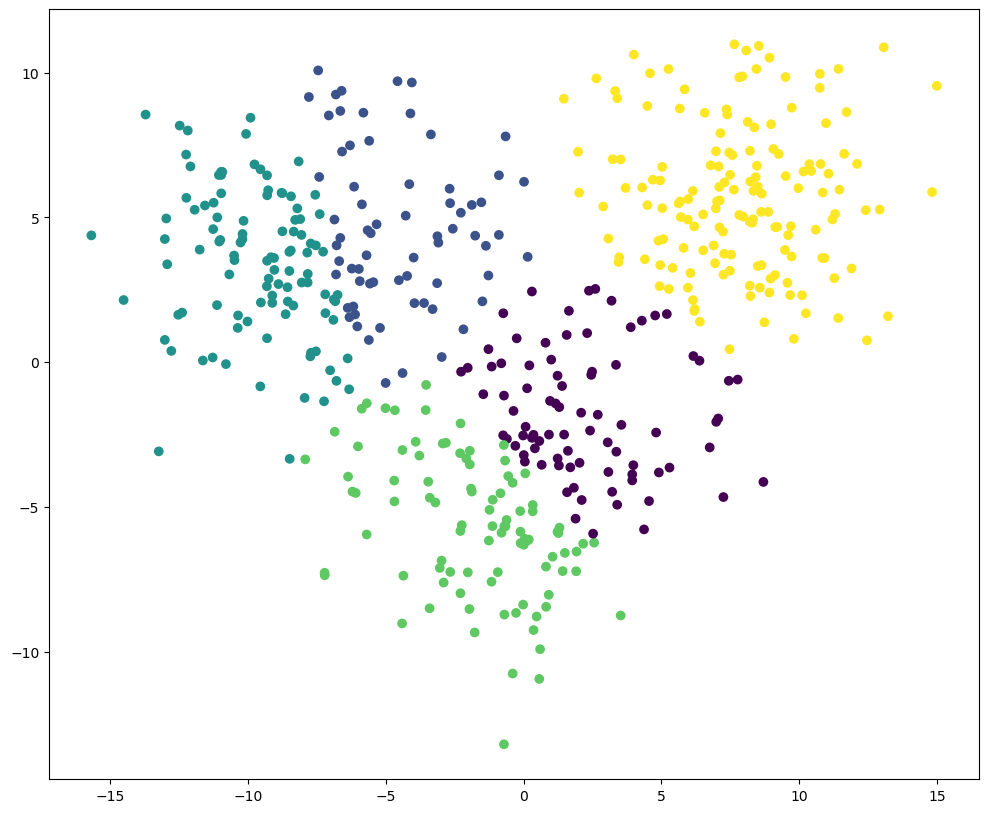

In [22]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = k_means.predict(attributes))

<b>n_clusters = 6</b>

In [23]:
k_means = KMeans(n_clusters = 6, init = 'random')

In [24]:
k_means.fit(attr_train)

KMeans(init='random', n_clusters=6)

In [25]:
train_predictions = k_means.predict(attr_train)

In [26]:
test_predictions = k_means.predict(attr_test)

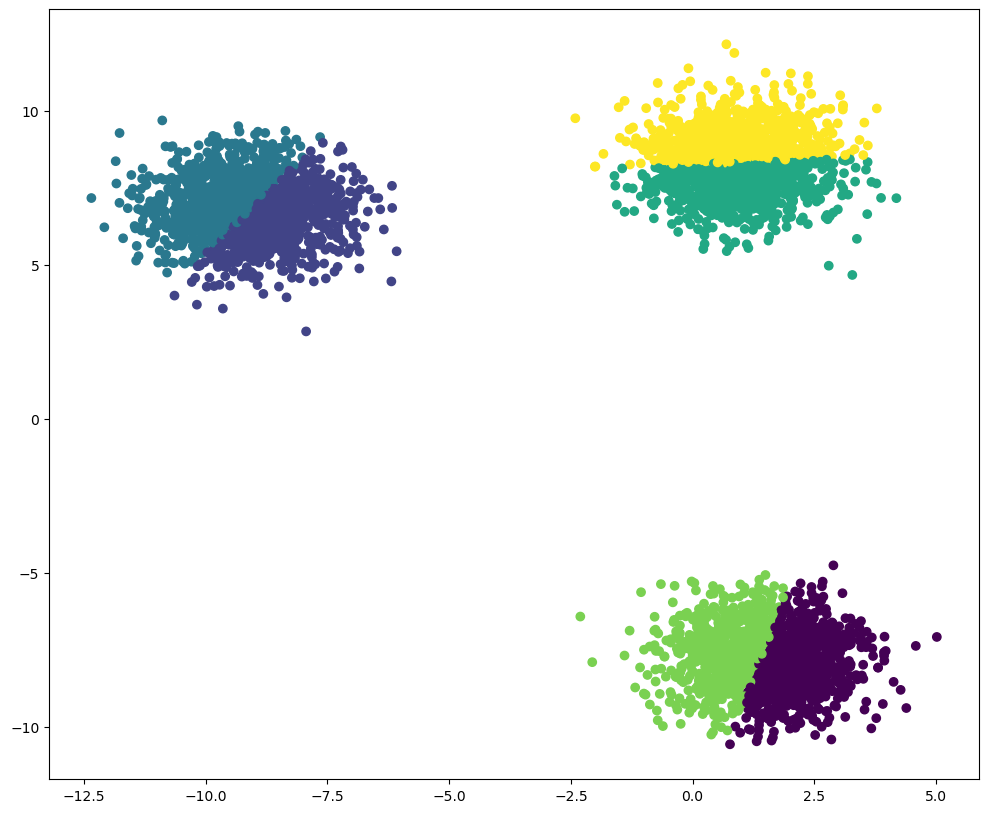

In [27]:
plt.figure(figsize = (12, 10))
plt.scatter(attr_train[:, 0], attr_train[:, 1], c = train_predictions)

<b>n_clusters = 5</b>

In [28]:
k_means = KMeans(n_clusters = 5, init = 'random')

In [29]:
k_means.fit(attr_train)

KMeans(init='random', n_clusters=5)

In [30]:
train_predictions = k_means.predict(attr_train)

In [31]:
test_predictions = k_means.predict(attr_test)

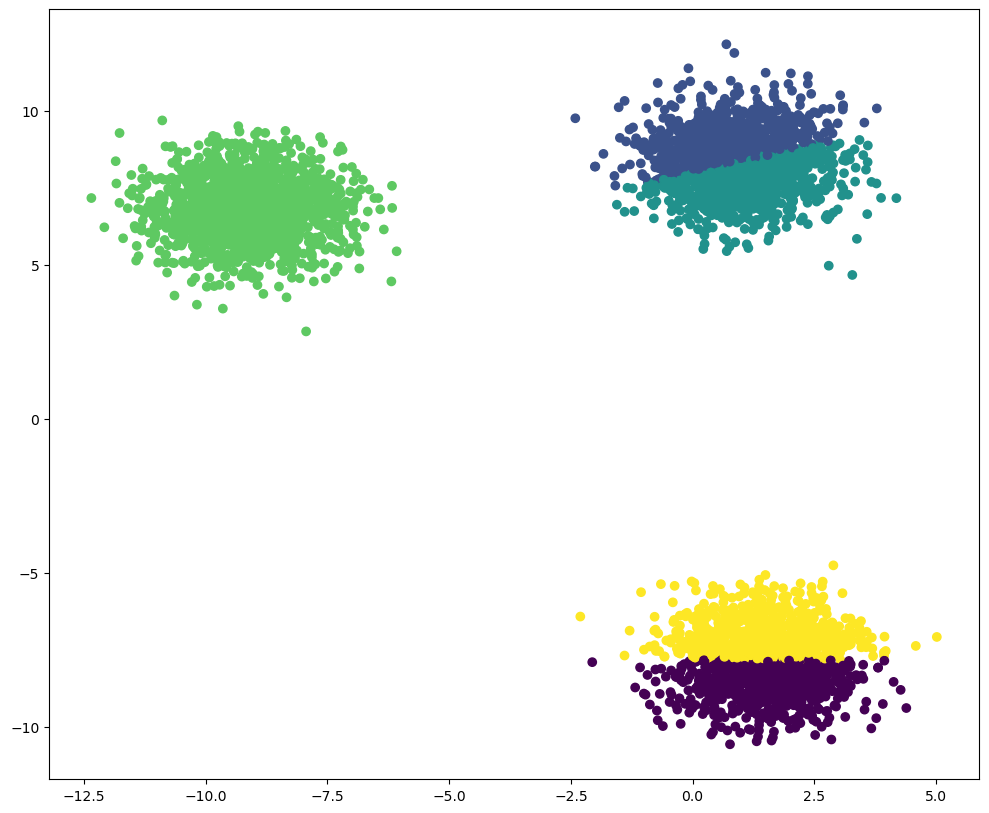

In [32]:
plt.figure(figsize = (12, 10))
plt.scatter(attr_train[:, 0], attr_train[:, 1], c = train_predictions)

<b>close clusters</b>

In [33]:
k_means = KMeans(n_clusters = 3, init = 'random')

In [34]:
attributes, clusters = make_blobs(n_samples = 500)

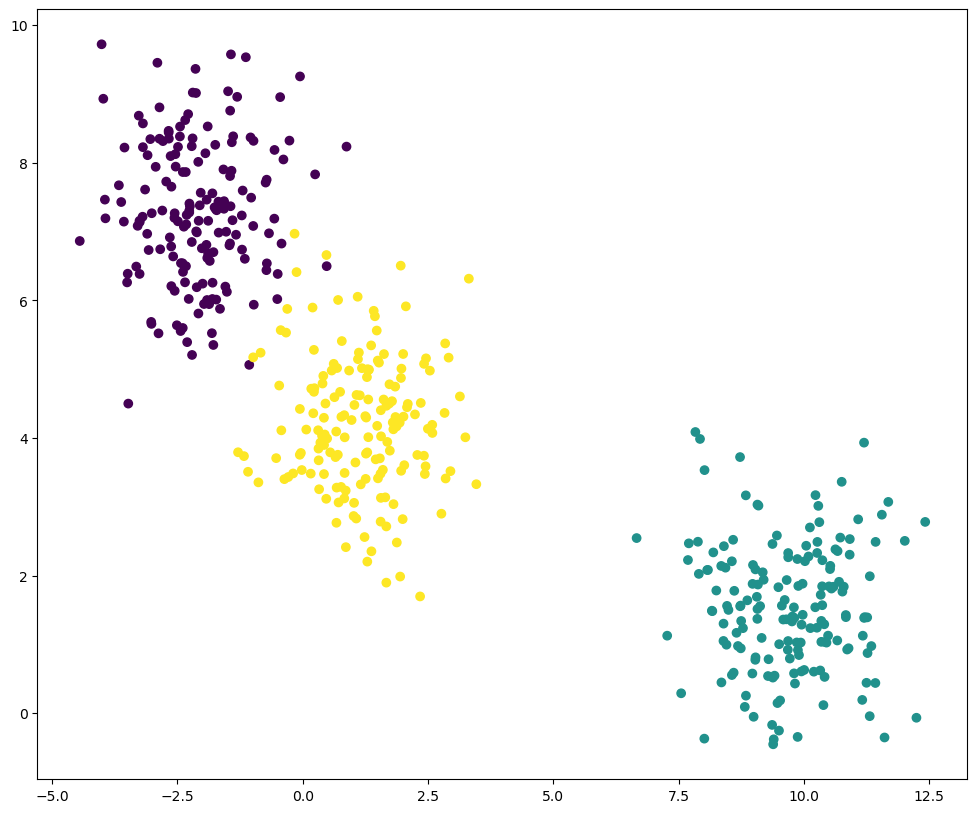

In [35]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)

In [67]:
k_means.fit(attributes)

KMeans(n_clusters=10)

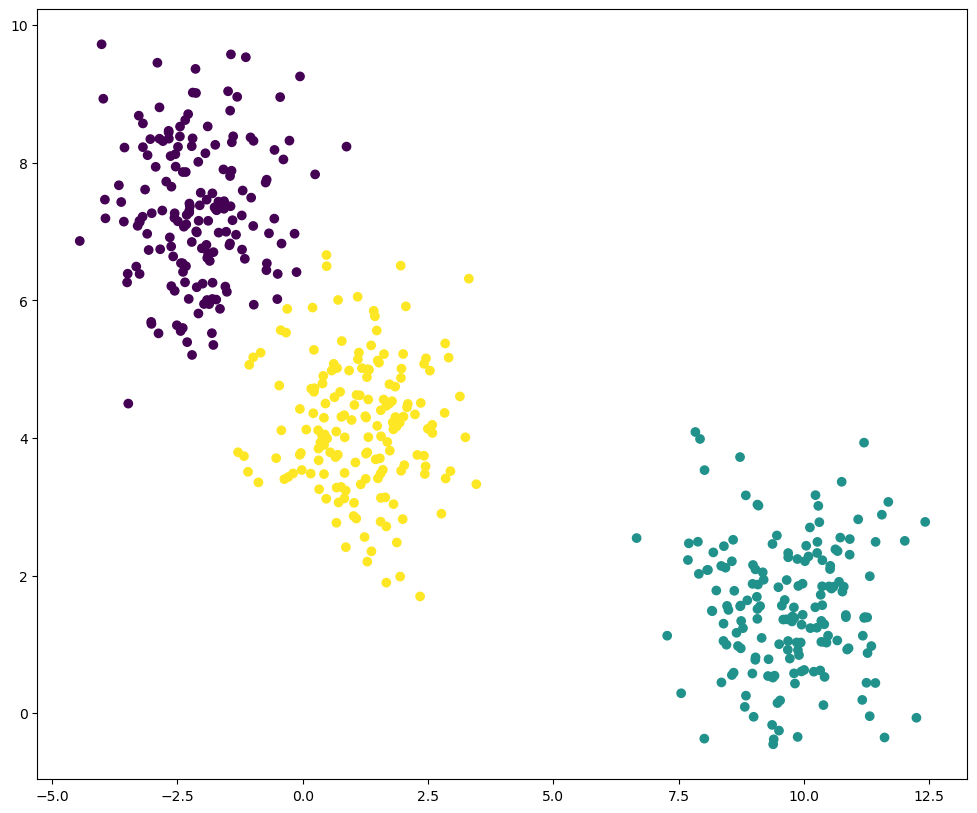

In [37]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = k_means.predict(attributes))

In k-Means there are no overlapping clusters.

<b>Elipsoid classes</b>

In [38]:
attributes, clusters = make_blobs(n_samples = 500)

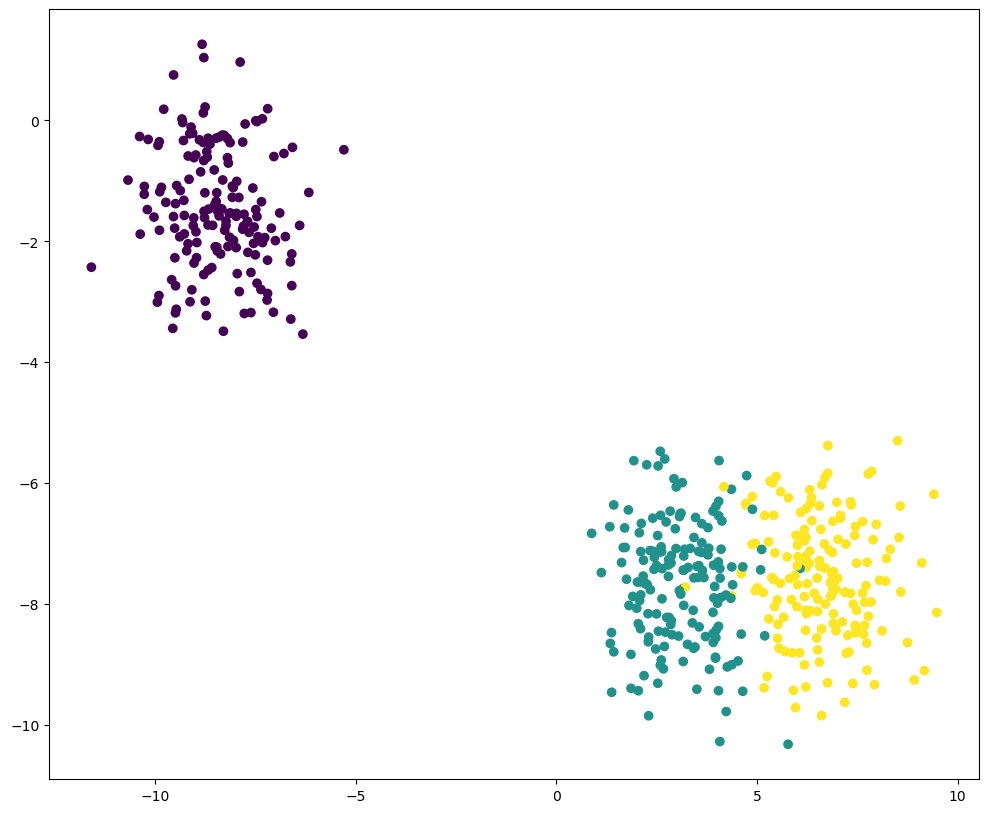

In [39]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)

In [40]:
attributes_skewed = attributes @ np.array([
    [1, 0.5],
    [0.8, 1]
])

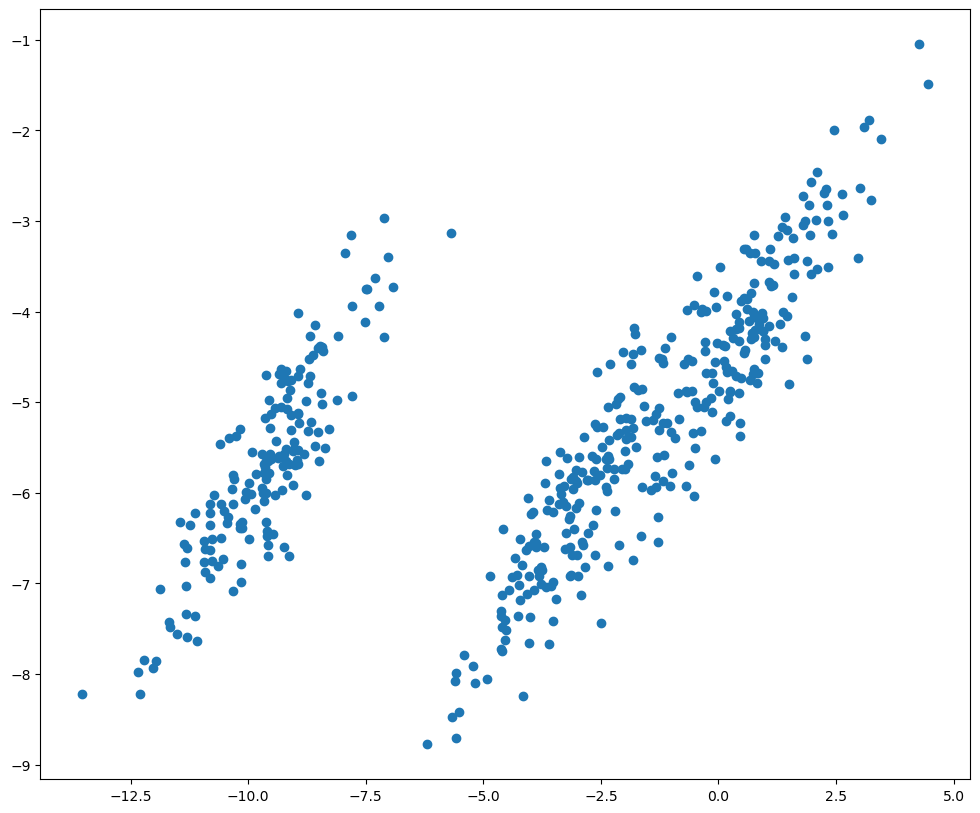

In [41]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1])

In [68]:
k_means.fit(attributes_skewed)

KMeans(n_clusters=10)

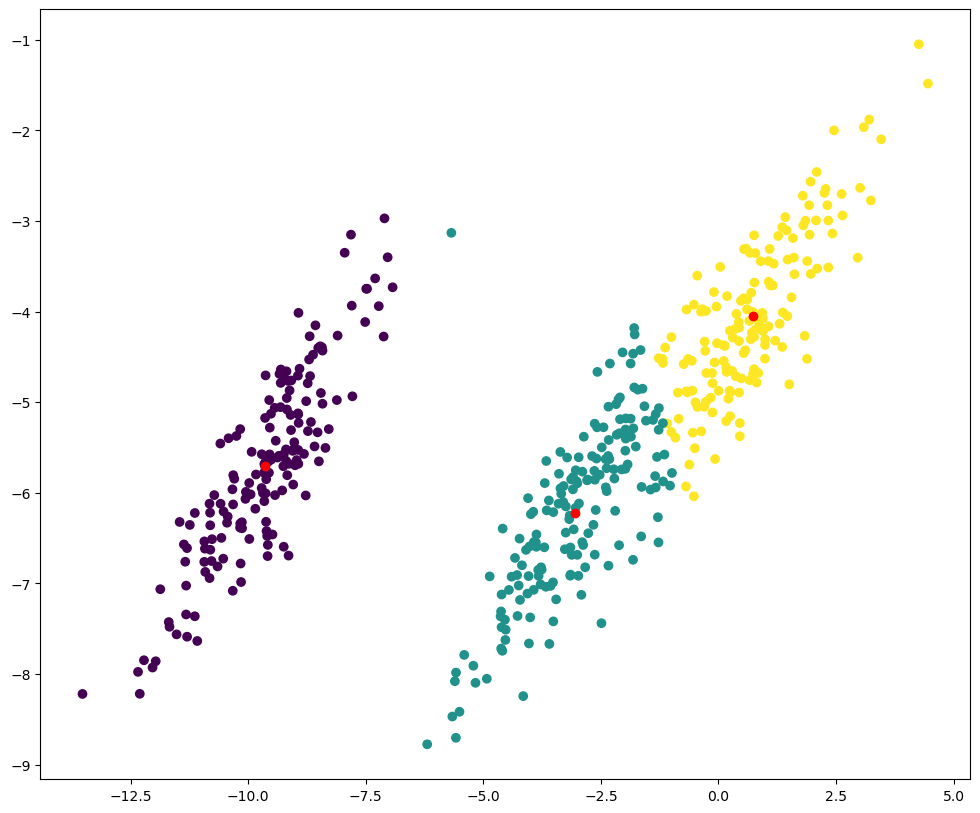

In [43]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c = k_means.predict(attributes_skewed))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = 'red')

In [44]:
k_means.cluster_centers_

array([[-9.63425959, -5.70204371],
       [-3.05993243, -6.22316418],
       [ 0.72578279, -4.05295337]])

<b>centroids</b>

In [45]:
k_means = KMeans(n_clusters = 3, init = [[10, -6], [10, -4], [0, -8]])

In [69]:
k_means.fit(attributes)

KMeans(n_clusters=10)

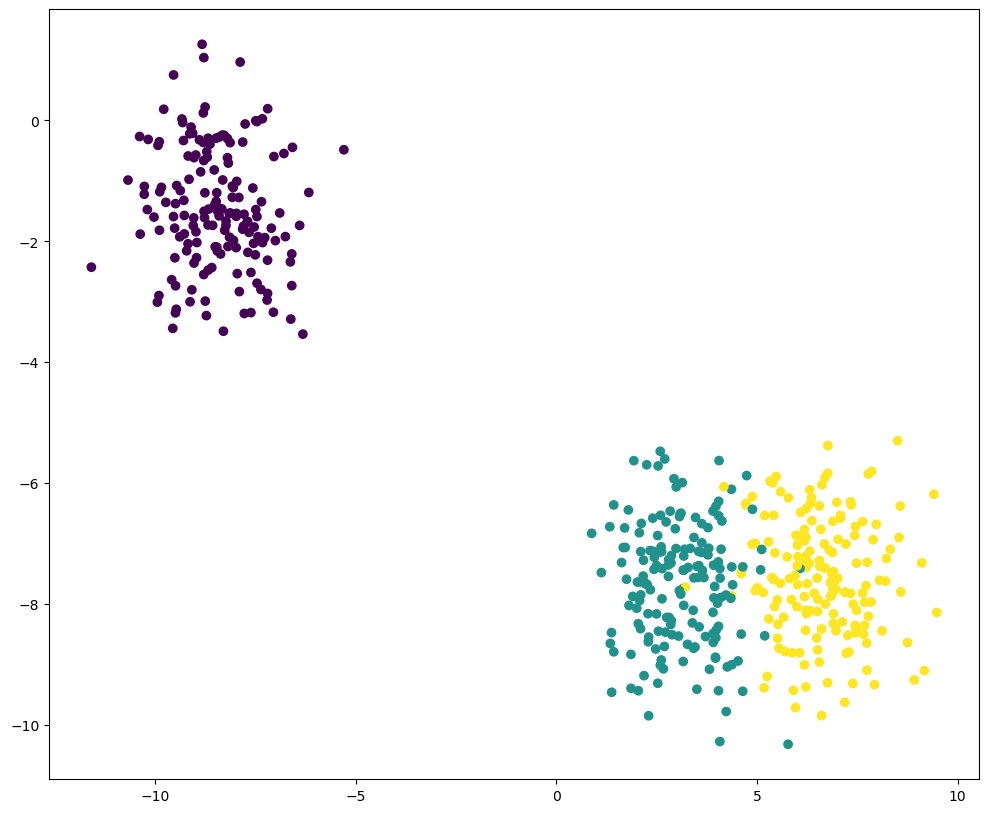

In [47]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)

<b>Loss function</b>

cluster inertia

{\Large 
$J = \sum_{i=0}^{n} \min_{\mu_j \in C} \| x_i - \mu_j \|^2$
}

    J is the objective function representing cluster inertia.
    n is the number of data points.
    xi​ represents the ii-th data point.
    μj​ is the centroid of cluster j.
    C is the set of all cluster centroids.
    The minimization selects the closest centroid μj​ for each data point xi.

<b>default = kmeans++</b>

k-Means++ uses centers which are far away from each other

In [48]:
k_means = KMeans(n_clusters = 3, init = "k-means++")

In [60]:
k_means.fit(attributes_skewed)

KMeans(n_clusters=10)

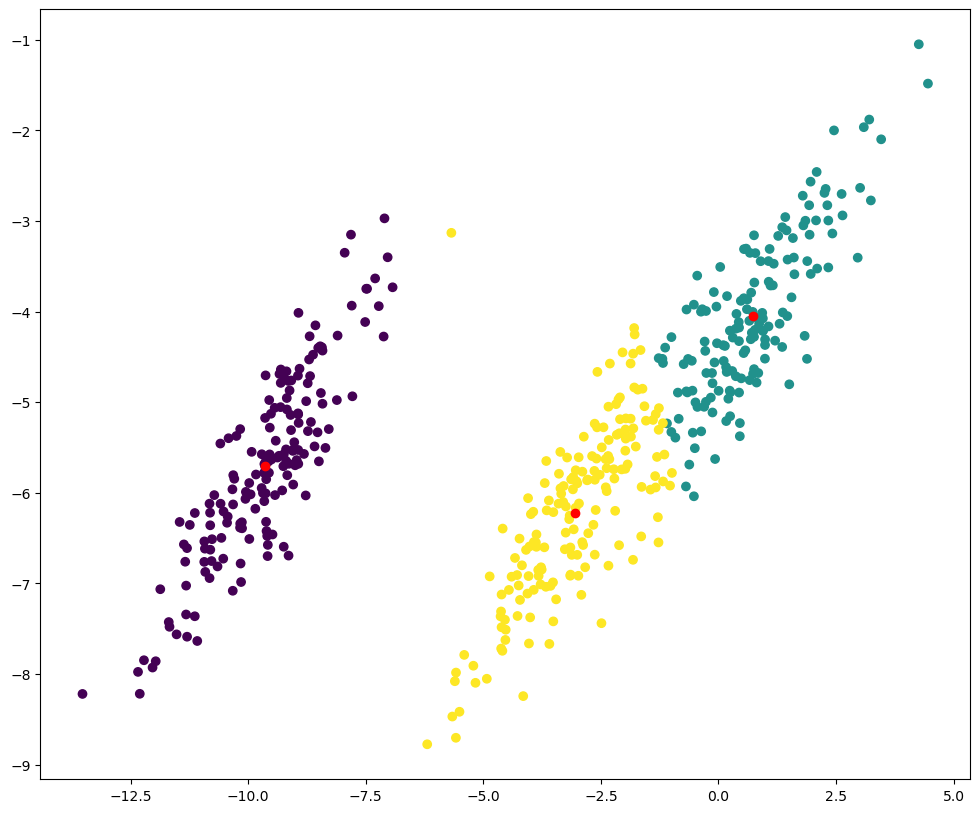

In [50]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c = k_means.predict(attributes_skewed))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = 'red')

<b>n_clusters = 9, init = "k-means++"</b>

In [51]:
k_means = KMeans(n_clusters = 9, init = "k-means++")

In [61]:
k_means.fit(attributes_skewed)

KMeans(n_clusters=10)

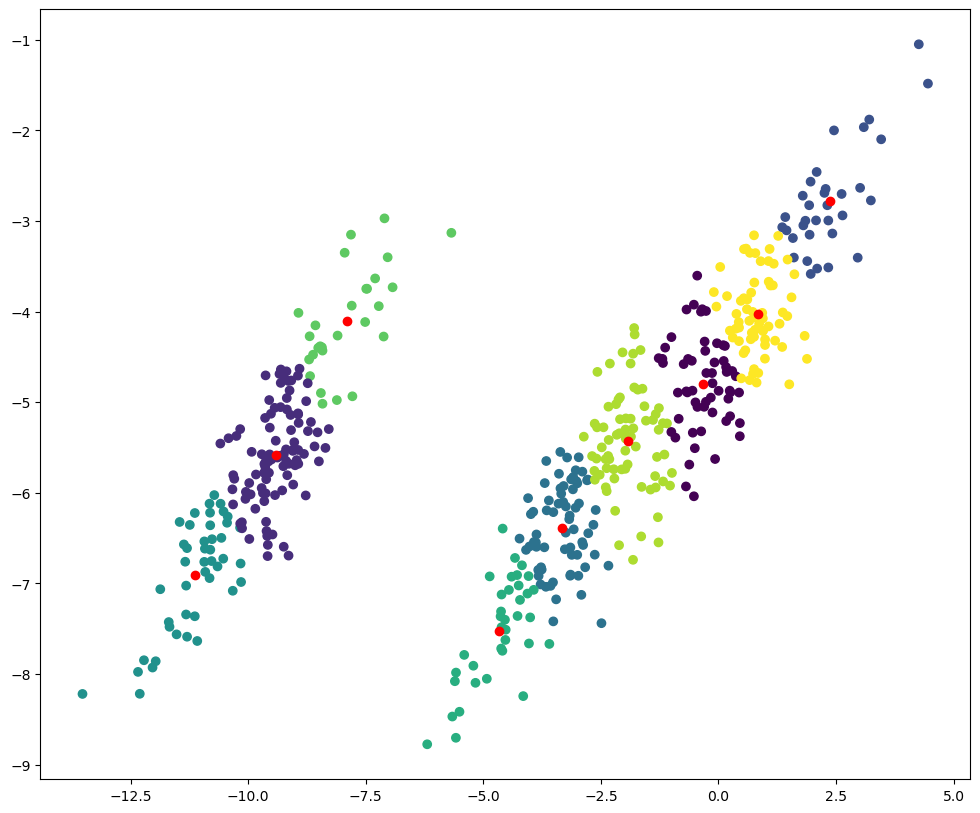

In [53]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c = k_means.predict(attributes_skewed))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = 'red')

The algorithm is unstables, it gives different clusters at each initialization.

In [54]:
k_means = KMeans(n_clusters = 3, init = "k-means++")

In [62]:
k_means.fit(attributes_skewed)

KMeans(n_clusters=10)

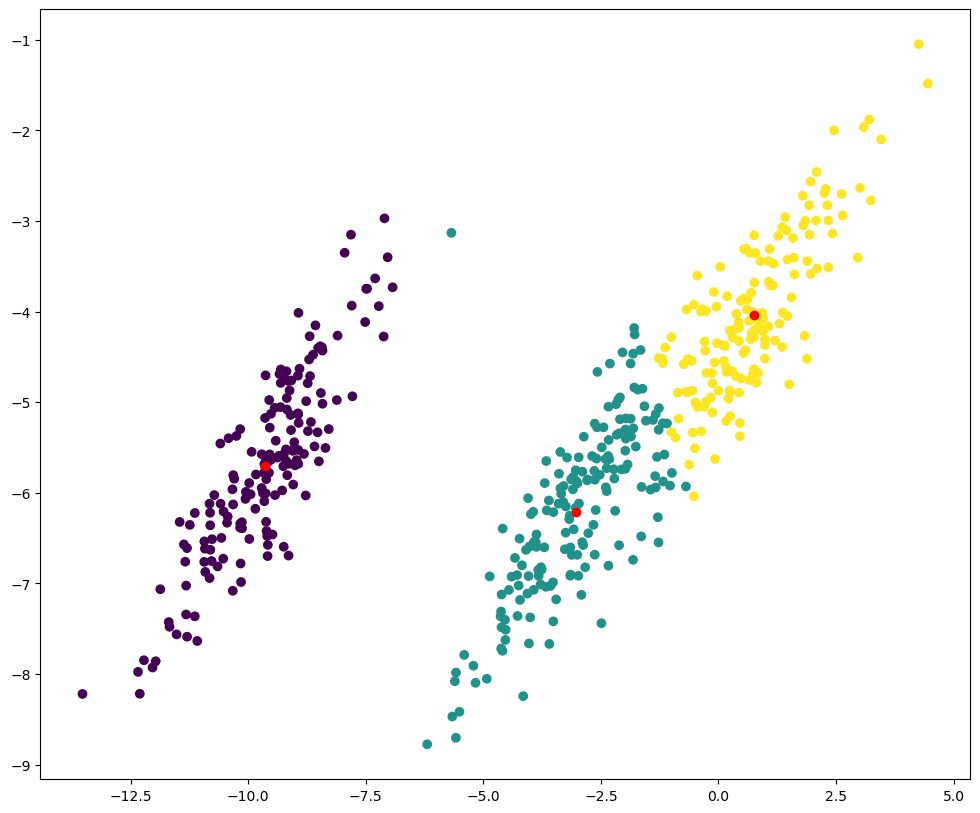

In [56]:
plt.figure(figsize = (12, 10))
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c = k_means.predict(attributes_skewed))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = 'red')

In [57]:
k_means.inertia_

1128.6023578126324

<b>Elbow method</b>

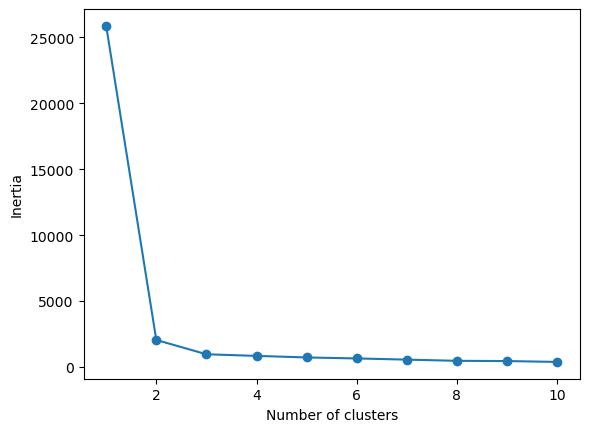

In [63]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(attributes)
    inertias.append(km.inertia_)
plt.plot(range(1,11), inertias, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [64]:
for n in range(1, 11):
    k_means = KMeans(n_clusters = n)
    k_means.fit(attributes)
    print(k_means.inertia_)

25877.19708903056
2049.527403366894
964.4525334133214
831.2406459356542
738.3559714344809
668.4949584896592
546.964006481548
522.1569109897457
448.3062631141147
388.96276353785026


In [74]:
data = {
    'n_clusters': [],
    'inertias': []
}

In [75]:
for n in range(1, 11):
    k_means = KMeans(n_clusters = n)
    k_means.fit(attributes)
    data['n_clusters'].append(n)
    data['inertias'].append(k_means.inertia_)

In [76]:
data = pd.DataFrame(data)

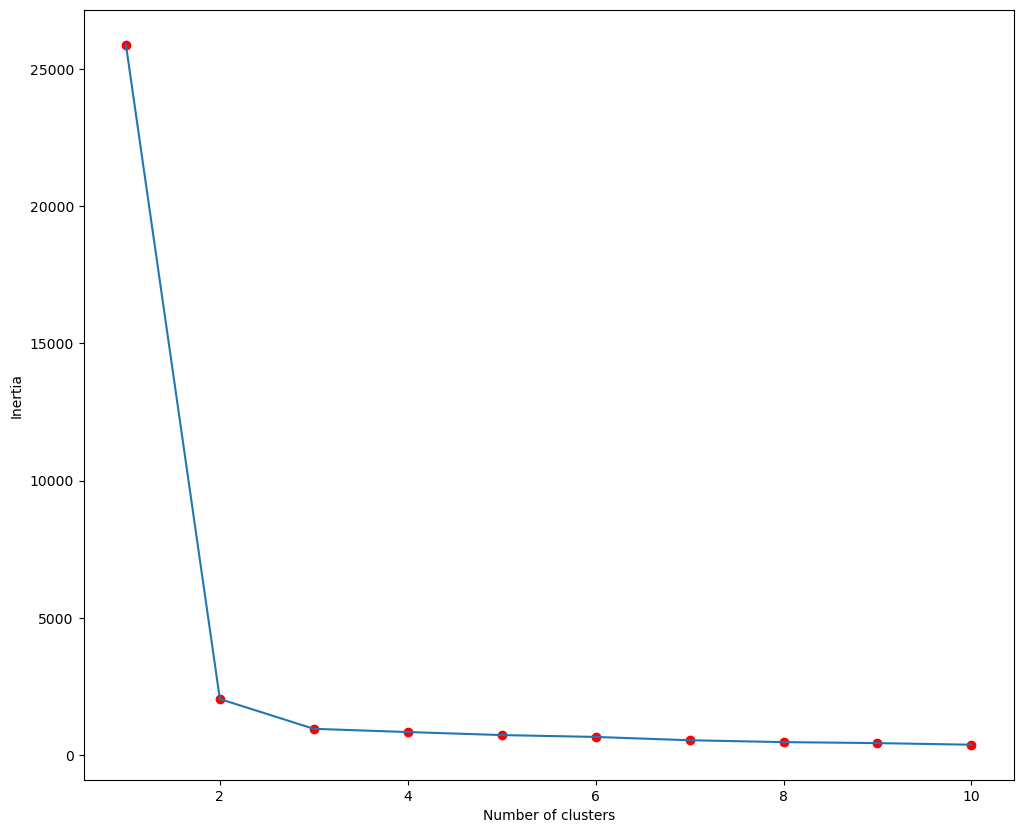

In [80]:
plt.figure(figsize = (12, 10))
plt.scatter(data.n_clusters, data.inertias, c = "red")
plt.plot(data.n_clusters, data.inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [82]:
# the differences between the inertias
-data.inertias.diff() 

0             NaN
1    23827.669686
2     1085.306186
3      117.146268
4      110.241990
5       67.943712
6      121.197608
7       67.744060
8       35.736119
9       59.133042
Name: inertias, dtype: float64

<b>Silhouette plot</b>

Use cluster cohesion (within-cluster distance) and cluster separation
(between-cluster distance) to calculate the silhouette coefficient for
each observation

[−1; 1]    1 – ideal, 0 - if the two distances are equal, −1 – worst

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


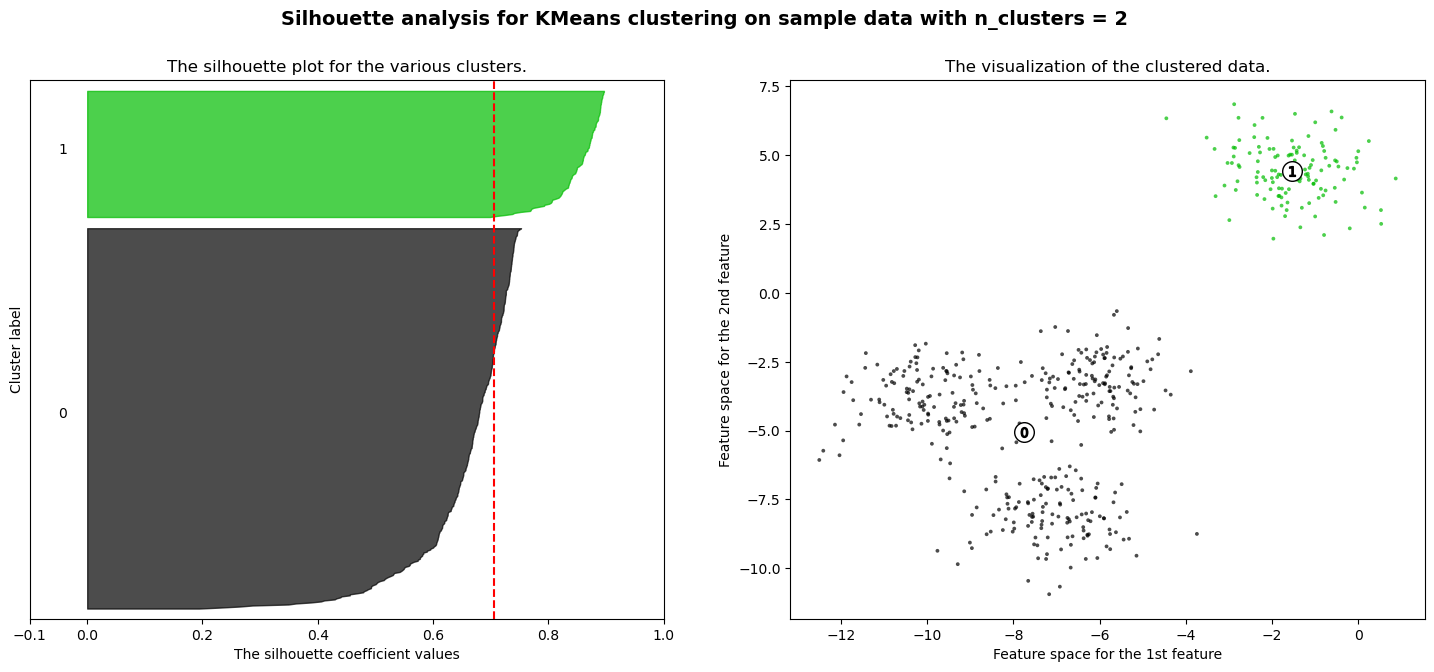

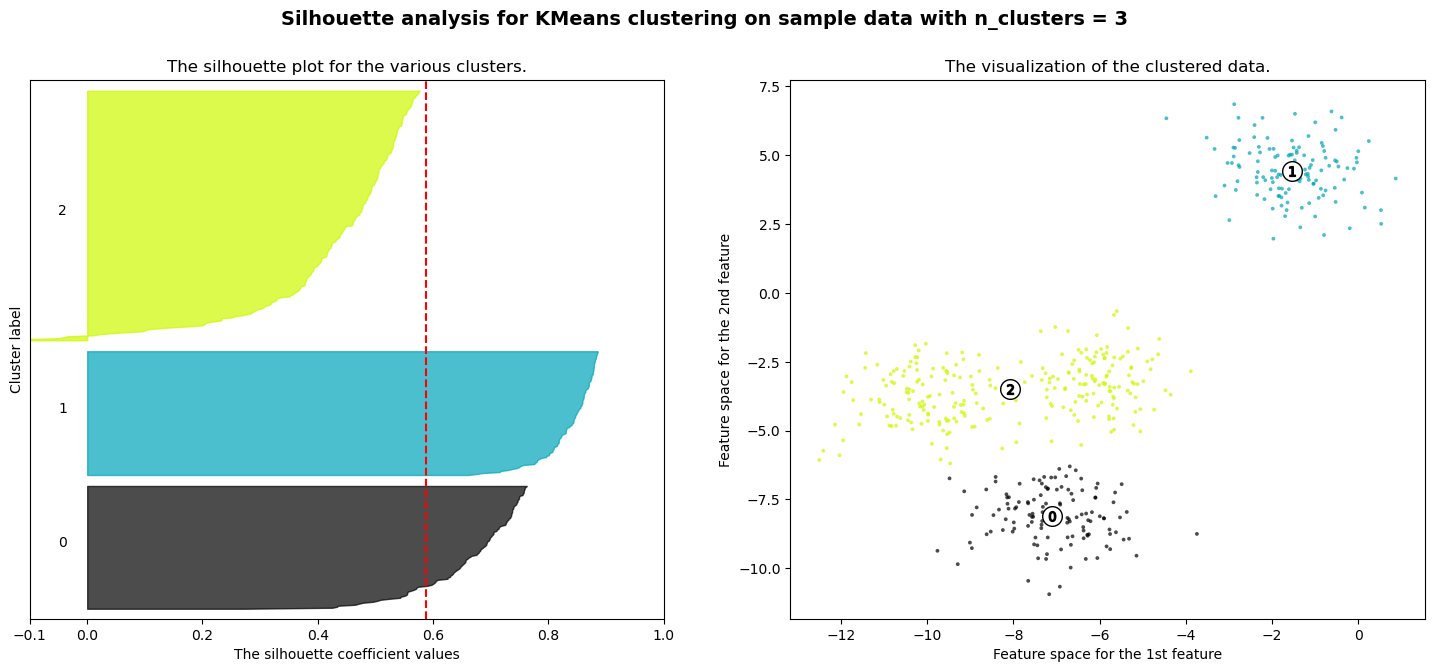

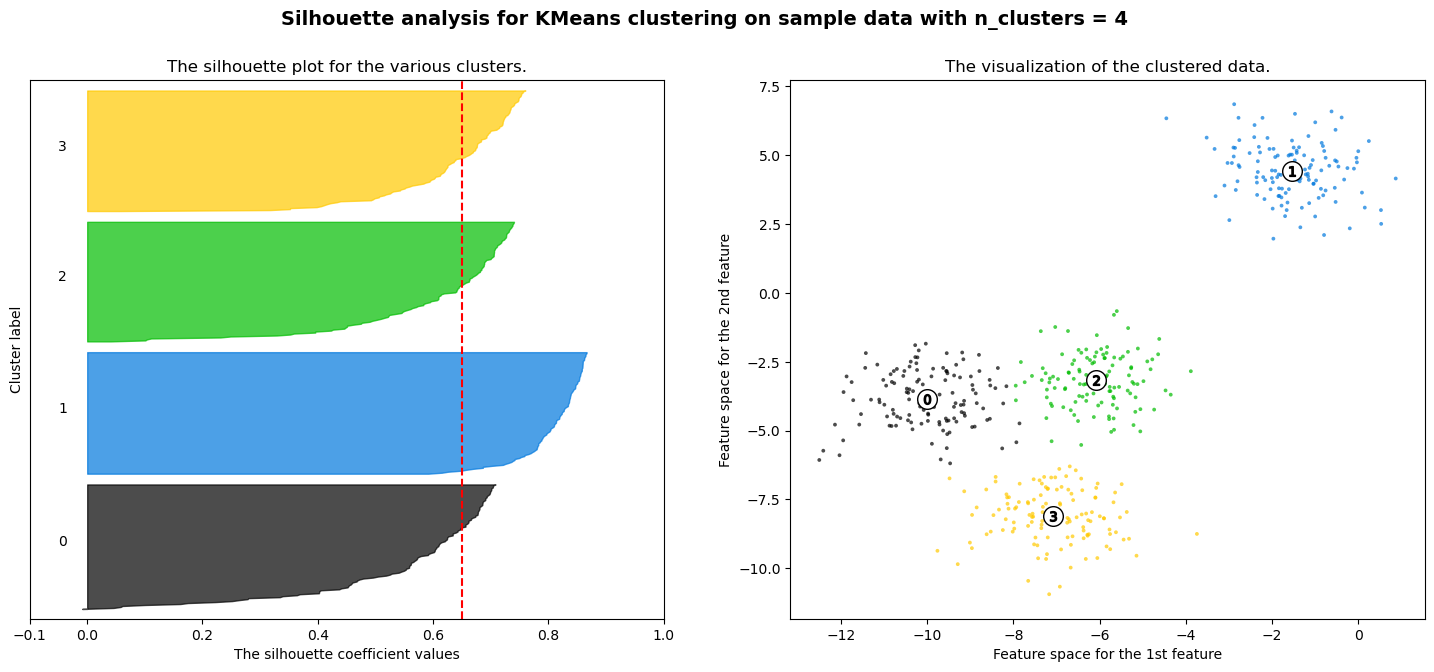

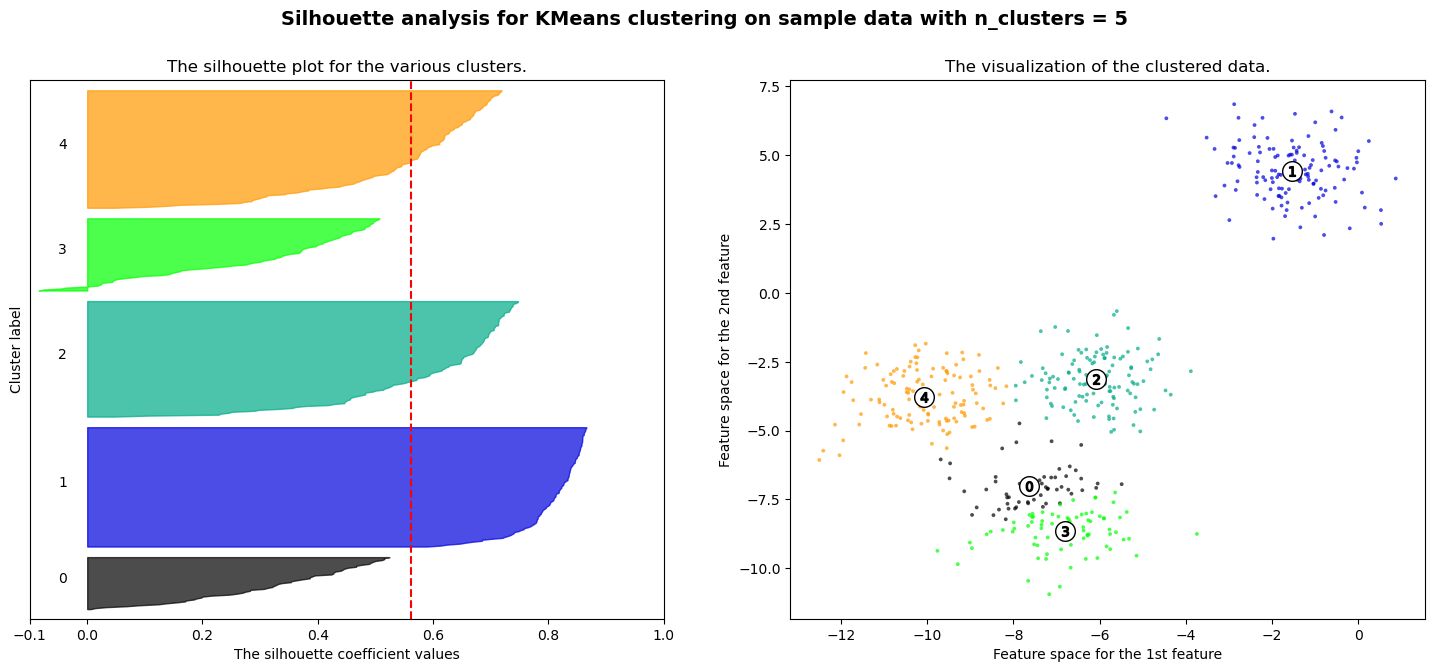

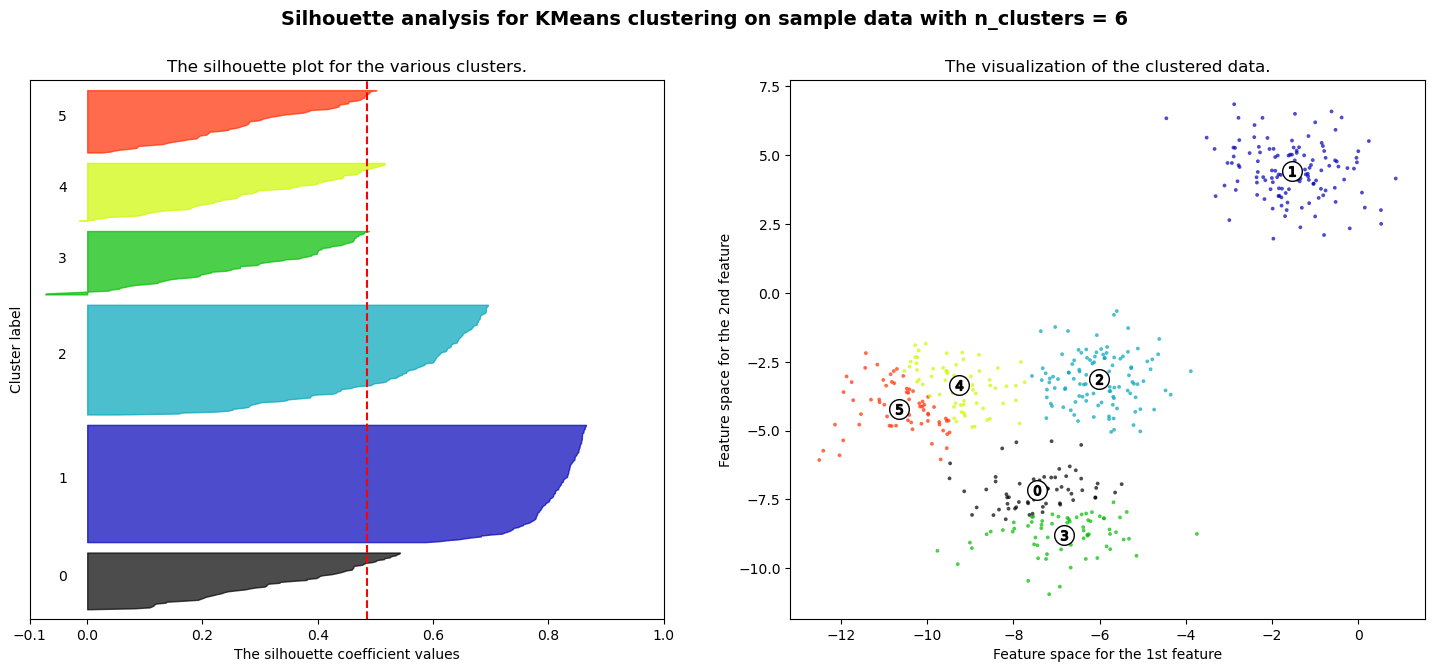

In [87]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Hierarchical Clustering

In [89]:
agglomerative_clustering = AgglomerativeClustering(n_clusters = 3, linkage = "complete")

In [90]:
agglomerative_clustering

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [91]:
agglomerative_clustering.fit(attributes)

AgglomerativeClustering(linkage='complete', n_clusters=3)

There is not predict in AgglomerativeClustering. It is not a method for prediction. It is a method for finding hierary in the data.

In [92]:
agglomerative_clustering.connectivity

In [93]:
agglomerative_clustering.labels_

array([1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1,
       0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2,
       1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2,

    Plot a dendrogram
    linkage() calculates a distance matrix
    dendrogram() creates the plot (x-axis: ID, y-axis: distance)

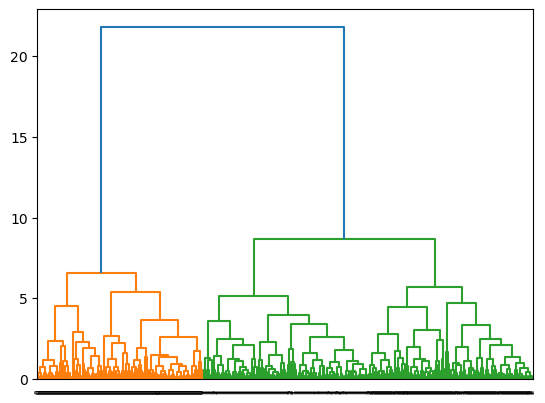

In [95]:
row_clusters = linkage(attributes, method = "complete", metric = "euclidean")
dendrogram(row_clusters, labels = clusters)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [50.0, 50.0, 80.0, 80.0],
  [20.0, 20.0, 65.0, 65.0]],
 'dcoord': [[0.0, 4.537017389186537, 4.537017389186537, 0.0],
  [0.0, 5.3839892915388665, 5.3839892915388665, 0.0],
  [4.537017389186537,
   6.583745189360267,
   6.583745189360267,
   5.3839892915388665],
  [0.0, 5.118960635991731, 5.118960635991731, 0.0],
  [0.0, 4.482411797609044, 4.482411797609044, 0.0],
  [0.0, 4.728082194705979, 4.728082194705979, 0.0],
  [4.482411797609044, 5.718115336316835, 5.718115336316835, 4.728082194705979],
  [5.118960635991731, 8.697986349760102, 8.697986349760102, 5.718115336316835],
  [6.583745189360267,
   21.822102363251357,
   21.822102363251357,
   8.697986349760102]],
 'ivl': ['(35)',
  '(32)',
  '(27)',
  '(73)',
  '(56)',
  '(111)',
  '(37)',
  '(40)',
  '(5)',
  '(84)'],
 'leaves': [975, 

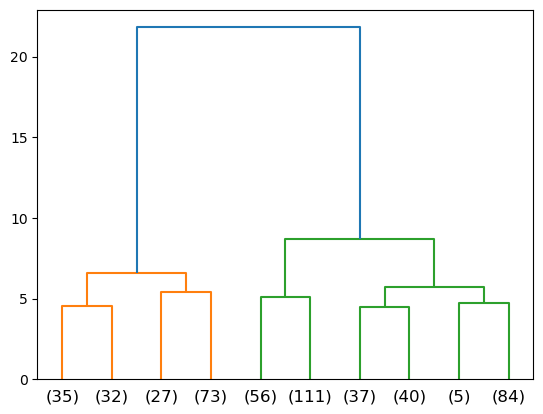

In [98]:
# Show only the last 10 merged clusters
dendrogram(row_clusters, labels = clusters, truncate_mode = "lastp", p = 10)

<b>Dendrogram on iris dataset</b>

Source: https://scikit-learn.org/1.5/auto_examples/cluster/plot_agglomerative_dendrogram.html

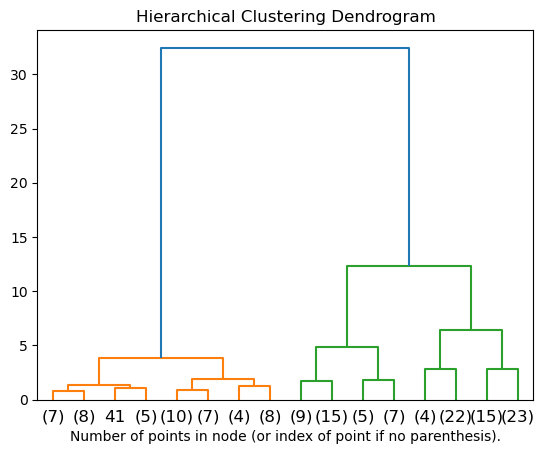

In [100]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<b>Comparing different hierarchical linkage methods</b>

Source: https://scikit-learn.org/1.5/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

In [103]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

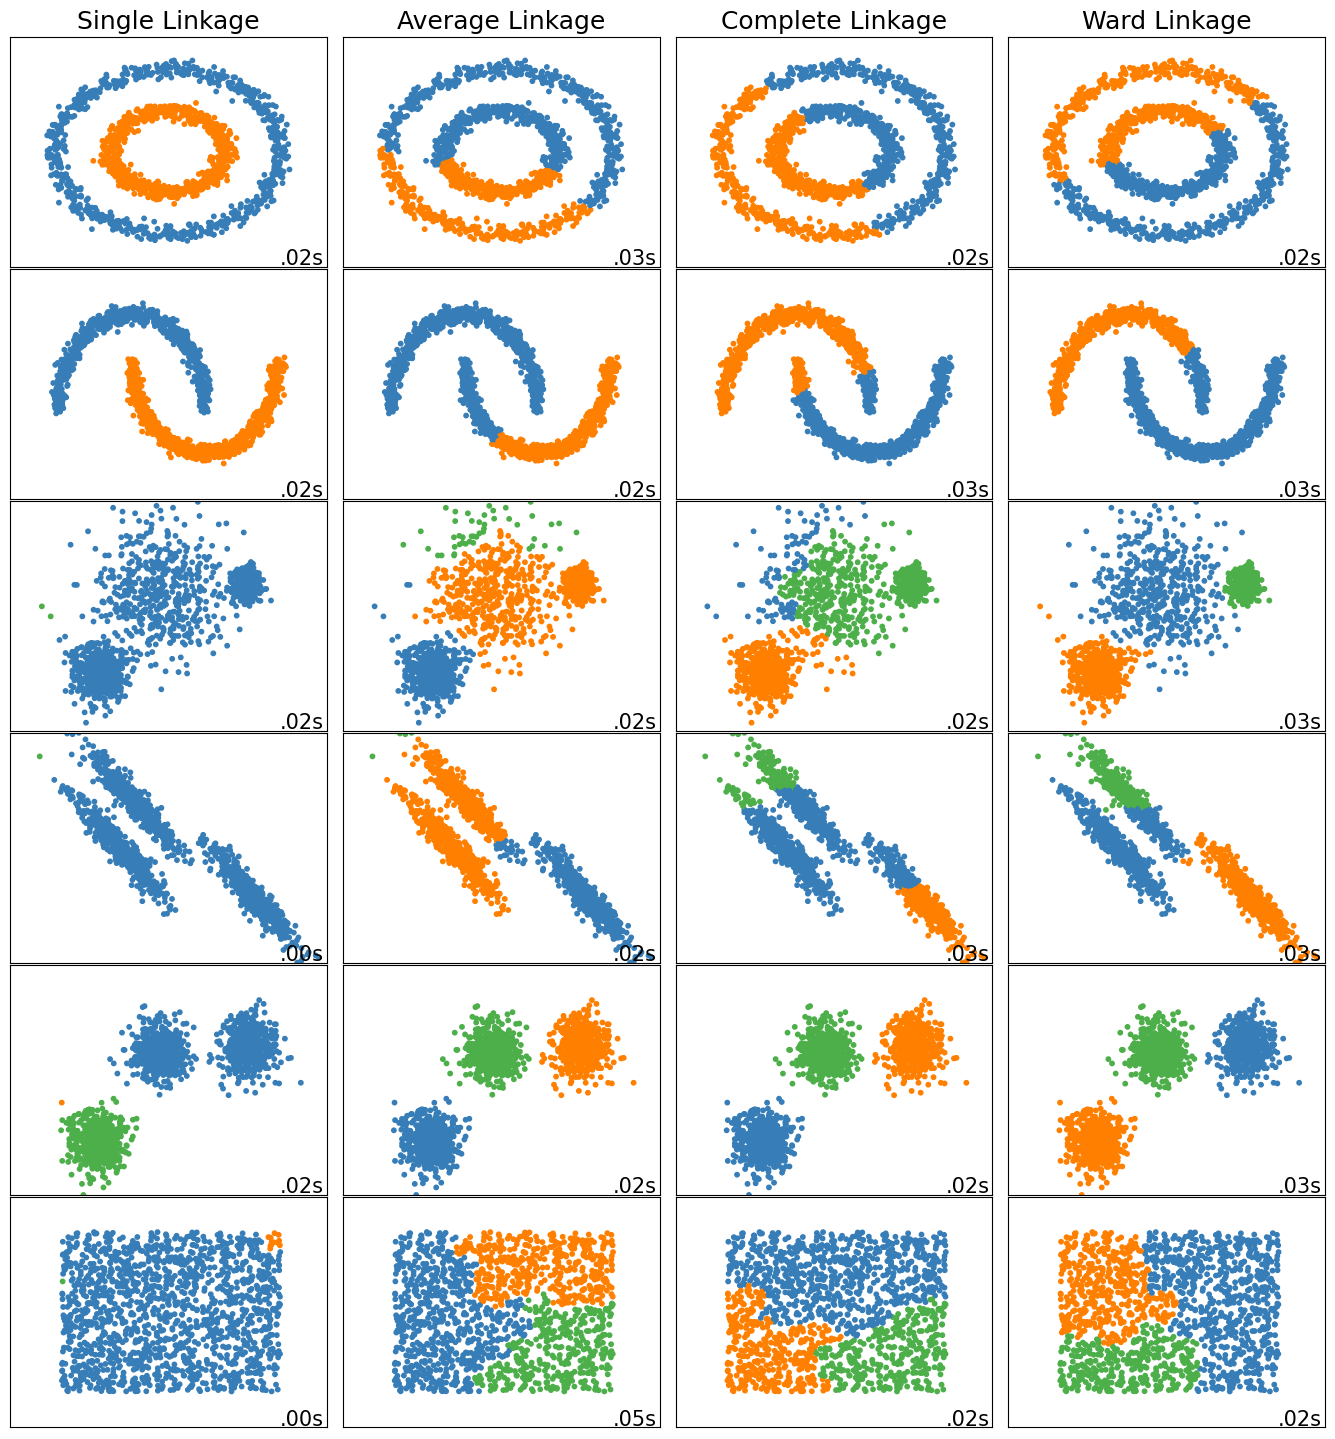

In [108]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

<b>Comparing different clustering algorithms on toy datasets</b>

Source: https://scikit-learn.org/1.5/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

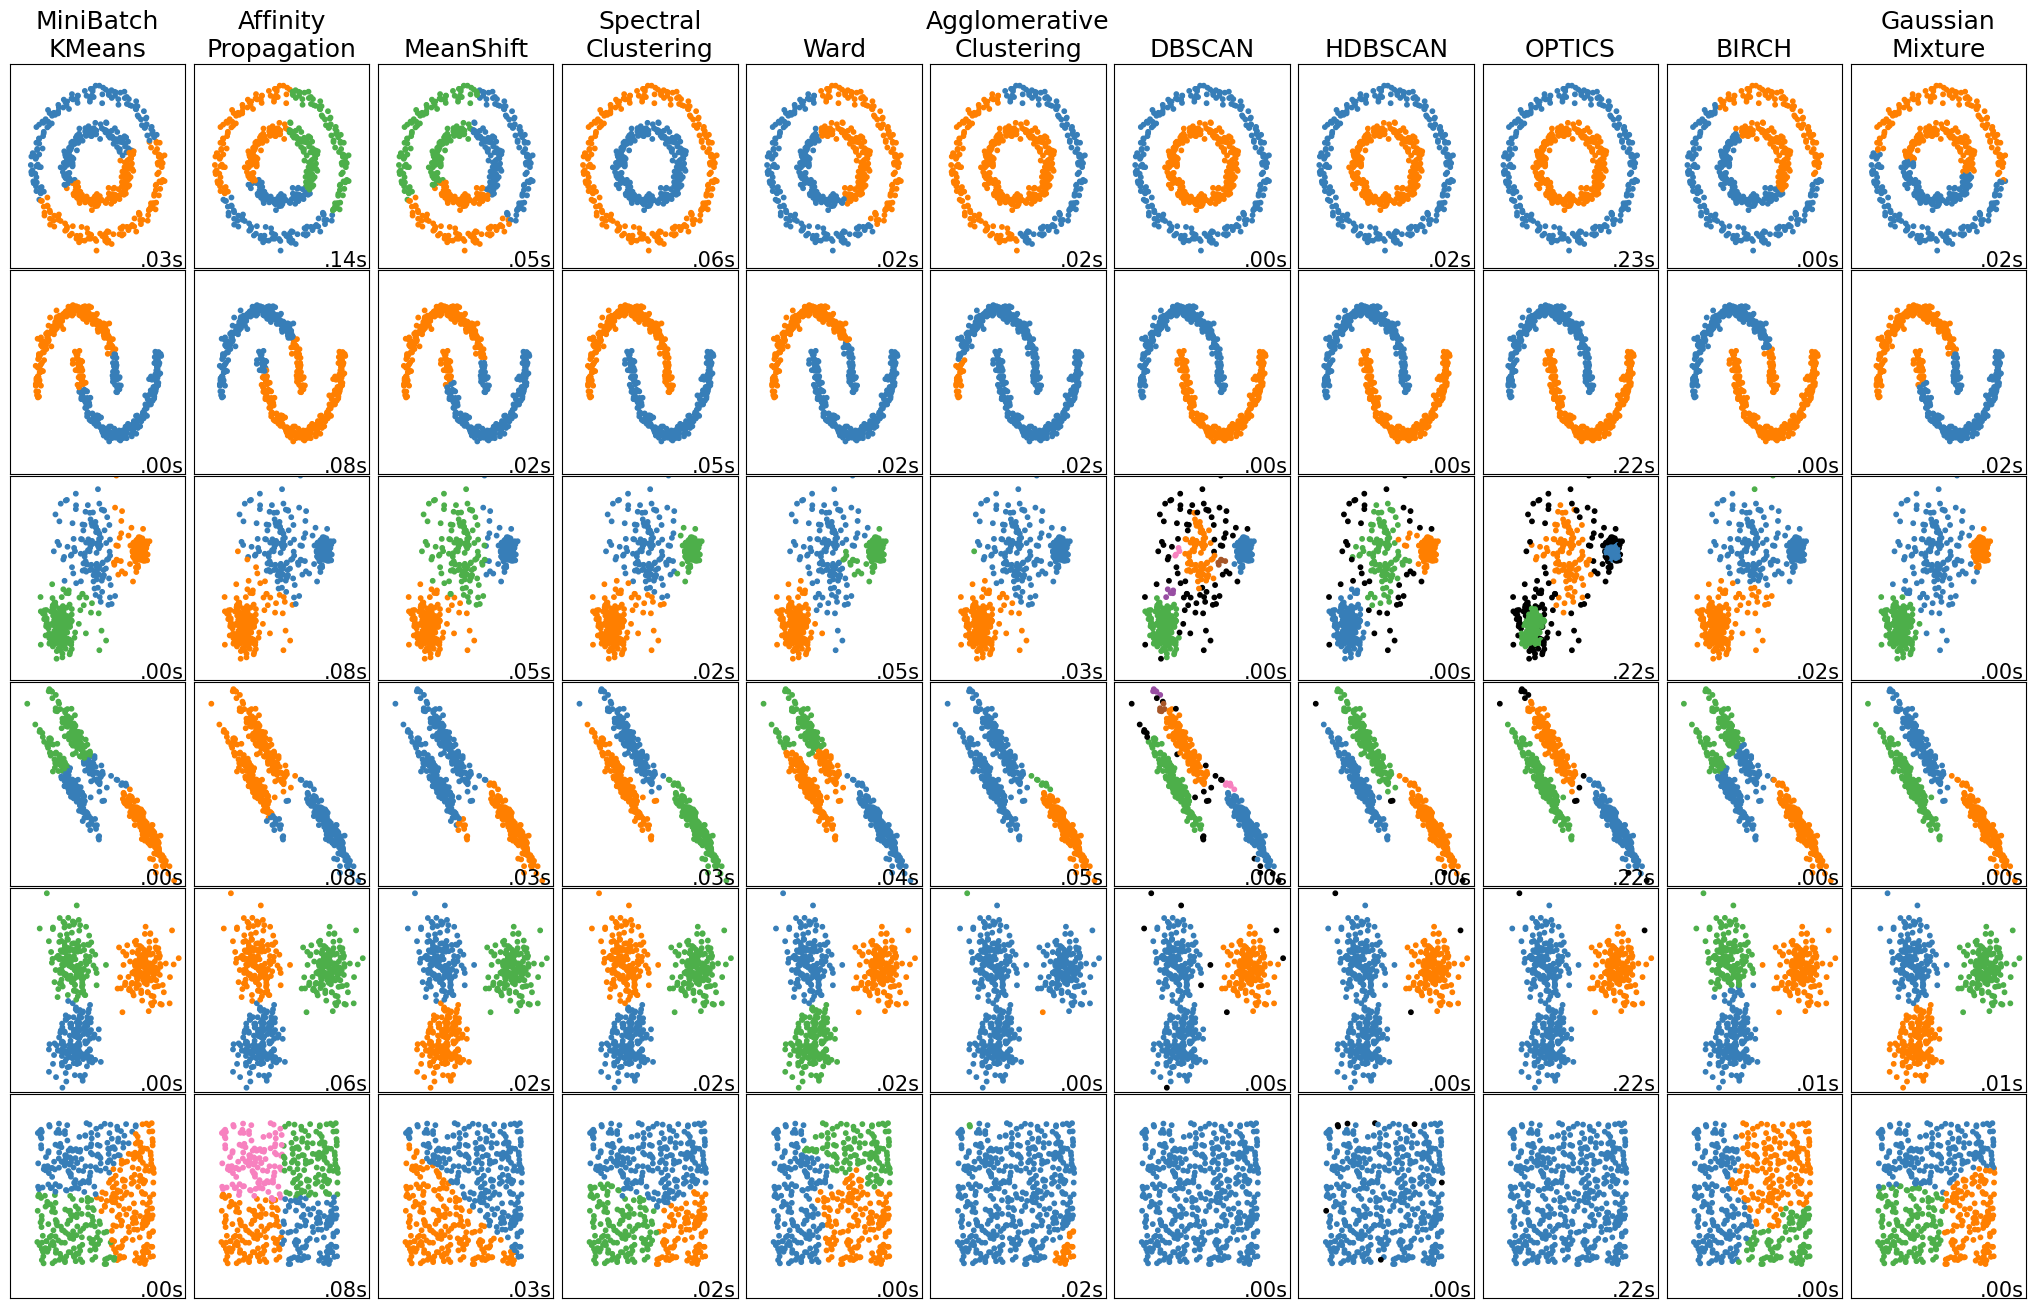

In [111]:
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

# DBSCAN